In [ ]:
### 10.1. Графические возможности Pandas

In [1]:
import  pandas as pd 

In [2]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
len(df)

244

In [5]:
df.total_bill.max()

50.81

In [ ]:
### 10.2 Метод plot

In [6]:
# автоматически выводит на экран все графики и диаграммы без использования дополнительных функций
%matplotlib inline

<AxesSubplot:>

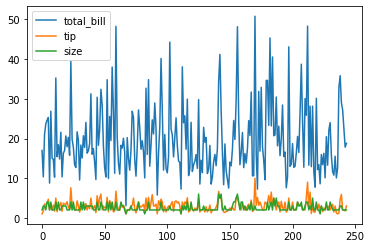

In [7]:
df.plot()

<AxesSubplot:ylabel='Frequency'>

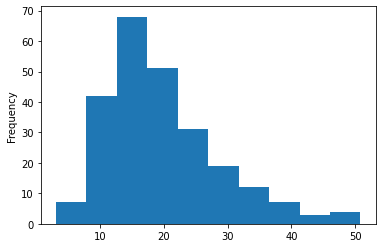

In [8]:
df['total_bill'].plot(kind = 'hist')

<AxesSubplot:title={'center':'Общая сумма счёта'}, ylabel='Frequency'>

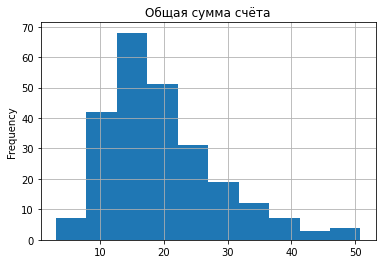

In [9]:
df['total_bill'].plot(kind = 'hist', grid = True, title = 'Общая сумма счёта')

<AxesSubplot:title={'center':'Количество посетителей по дням'}>

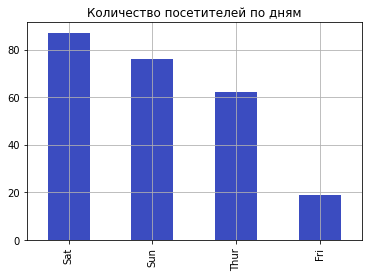

In [10]:
df['day'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Количество посетителей по дням')

<AxesSubplot:xlabel='sex,smoker'>

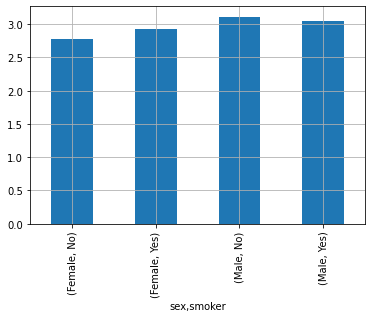

In [12]:
df.groupby(by = ['sex', 'smoker'])['tip'].mean().plot(kind = 'bar', grid= True)

In [ ]:
### 10.3 Отображение двух показателей на графике

array([<AxesSubplot:title={'center':'Общая сумма счёта'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'Сумма чаевых'}, ylabel='Frequency'>],
      dtype=object)

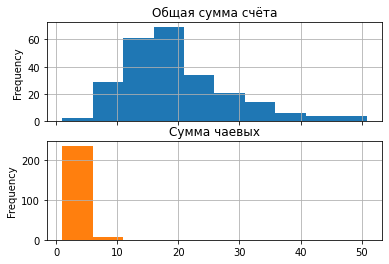

In [13]:
df[['total_bill', 'tip']].plot(kind = 'hist', 
                               grid = True, 
                               subplots = True, 
                               title = ['Общая сумма счёта', 'Сумма чаевых'], 
                               legend = False)

<AxesSubplot:title={'center':'Общая сумма счёта Vs сумма чаевых'}, xlabel='total_bill', ylabel='tip'>

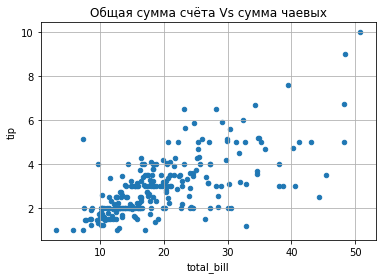

In [14]:
df.plot(x = 'total_bill', 
        y = 'tip', 
        kind = 'scatter', 
        grid = True, 
        title = 'Общая сумма счёта Vs сумма чаевых')

<AxesSubplot:xlabel='day'>

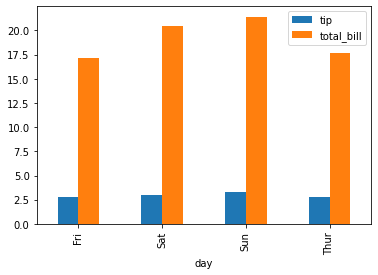

In [15]:
df.pivot_table(values = ['total_bill', 'tip'], 
               index = 'day', 
               aggfunc = 'mean').plot(kind = 'bar')

<AxesSubplot:xlabel='sex,smoker'>

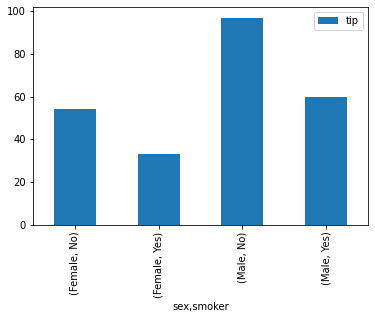

In [16]:
df.pivot_table(values = 'tip', index = ['sex', 'smoker'], aggfunc = 'count').plot(kind = 'bar')

<AxesSubplot:xlabel='smoker'>

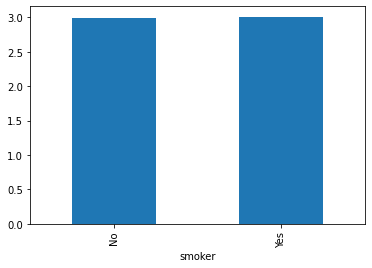

In [17]:
df.groupby('smoker')['tip'].mean().plot(kind = 'bar')

In [ ]:
### 10.4 Объектно-ориентированный подход

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Сумма заказа, USD')

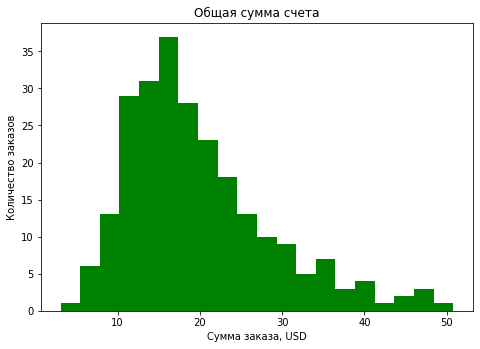

In [21]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'], bins = 20, color = 'green')
axes.set_title('Общая сумма счета')
axes.set_ylabel('Количество заказов')
axes.set_xlabel('Сумма заказа, USD')

Text(0, 0.5, 'Размер чаевых')

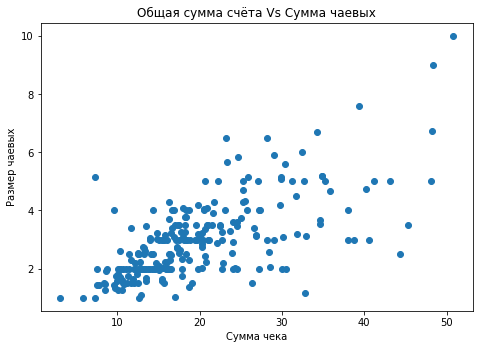

In [22]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

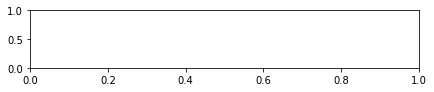

In [25]:
fig = plt.figure()
axes = fig.add_axes([0.2, 0.2, 0.9, 0.9])

In [26]:
### 10.5 Несколько систем координат

In [28]:
bills_per_day = df.groupby(by = 'day')['total_bill'].agg(['min','max']).reset_index()
bills_per_day

,day,min,max
0,Fri,5.75,40.17
1,Sat,3.07,50.81
2,Sun,7.25,48.17
3,Thur,7.51,43.11


<BarContainer object of 4 artists>

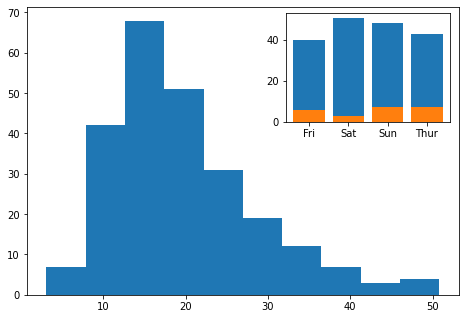

In [29]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['max'])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['min'])

<BarContainer object of 4 artists>

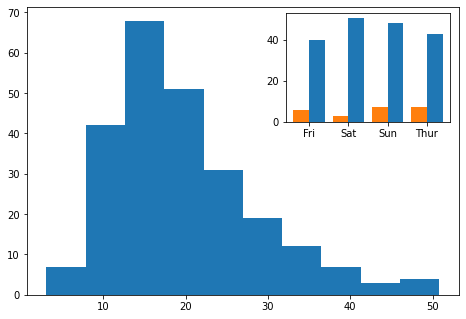

In [30]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['max'], 
                width = 0.4, align = 'edge')
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['min'], 
                width = -0.4, align = 'edge')

In [ ]:
### 10.6 Добавление легенды

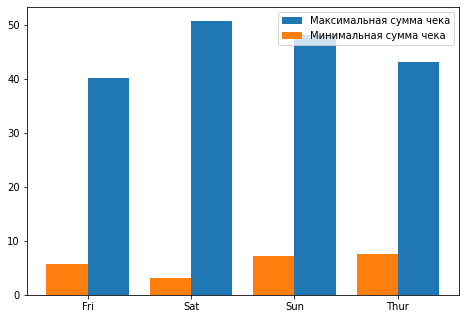

In [31]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = bills_per_day['day'], height = bills_per_day['max'], 
                width = 0.4, align = 'edge', label = 'Максимальная сумма чека')
axes.bar(x = bills_per_day['day'], height = bills_per_day['min'], 
                width = -0.4, align = 'edge', label = 'Минимальная сумма чека')
axes.legend(loc = 1)

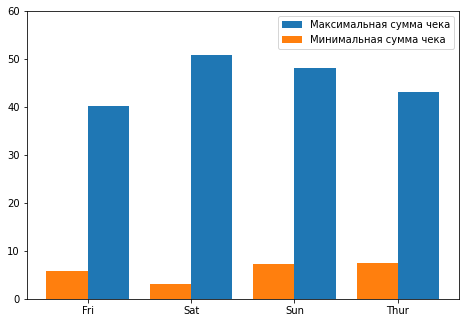

In [32]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_ylim(0, 60)    # !!!
axes.bar(x = bills_per_day['day'], height = bills_per_day['max'], 
                width = 0.4, align = 'edge', label = 'Максимальная сумма чека')
axes.bar(x = bills_per_day['day'], height = bills_per_day['min'], 
                width = -0.4, align = 'edge', label = 'Минимальная сумма чека')
axes.legend(loc = 1)

In [ ]:
### 10.7 Subplots

Text(0.5, 1.0, 'Total bill vs Tips')

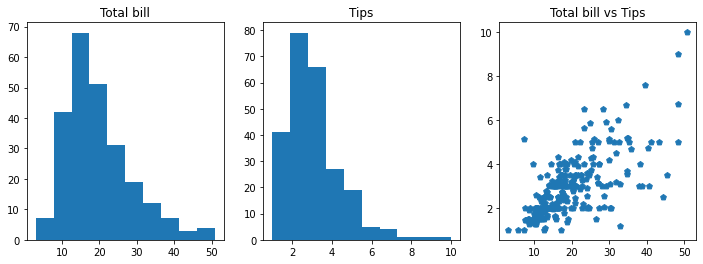

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))
axes[0].hist(df['total_bill'])
axes[0].set_title('Total bill')

axes[1].hist(df['tip'])
axes[1].set_title('Tips')

axes[2].scatter(x = df['total_bill'], y = df['tip'], marker = 'p')
axes[2].set_title('Total bill vs Tips')

In [ ]:
### 10.8 Создание линейных графиков

In [40]:
import numpy as np 

In [41]:
x = np.linspace(start=-3., stop=3., num=1000)
y1 = np.exp(x)

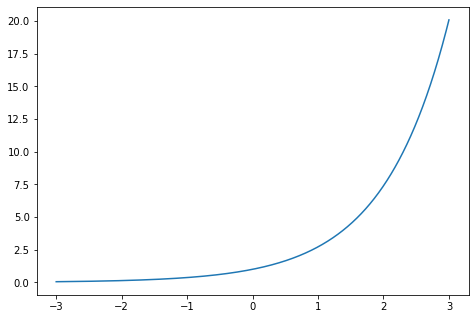

In [44]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1) 

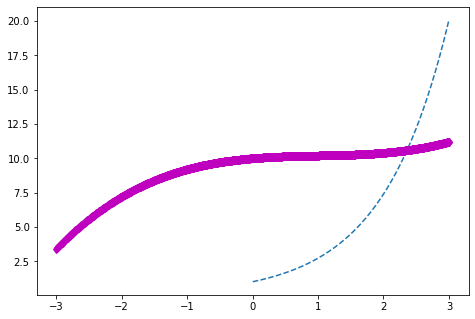

In [54]:
y2 = 10 + 0.4*x - 0.3*x**2 + 0.1*x**3

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[500:], y1[500:], linestyle='--') 
axes.plot(x, y2, 'md')

In [ ]:
### 10.9 Гистограммы распределения признаков

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
import warnings; warnings.simplefilter('ignore')    # don't show warning messages

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

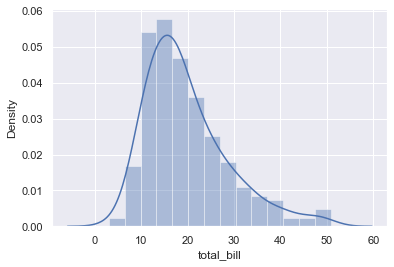

In [59]:
sns.set()   # for using of the standard plots displaying 
sns.distplot(df['total_bill'])

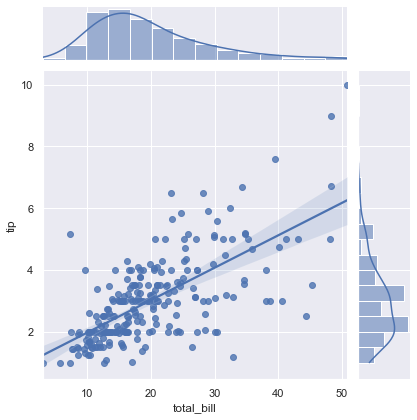

In [64]:
# histograms of both variables & joined scatter plot
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind = 'reg')  

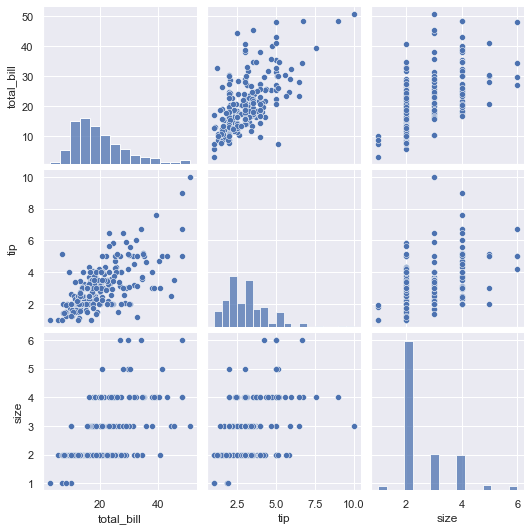

In [62]:
sns.pairplot(df)

In [ ]:
### 10.10 Работа с категориальными признаками

<AxesSubplot:xlabel='day', ylabel='count'>

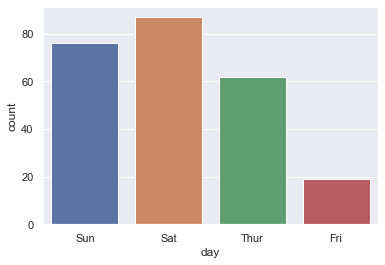

In [65]:
sns.countplot(x = 'day', data = df)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

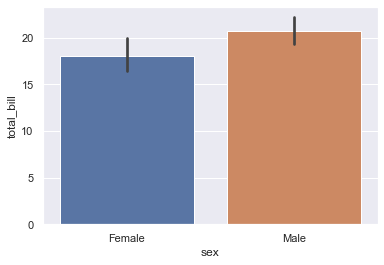

In [66]:
sns.barplot(x = 'sex', y = 'total_bill', data=df)

<AxesSubplot:xlabel='day', ylabel='tip'>

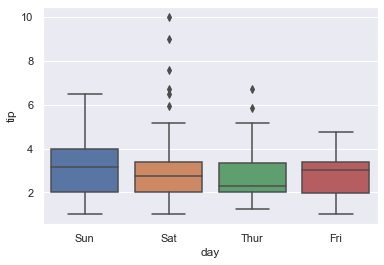

In [67]:
sns.boxplot(x='day', y='tip', data=df)

<AxesSubplot:xlabel='day', ylabel='tip'>

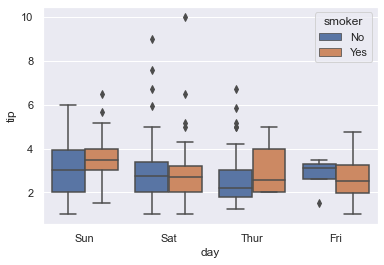

In [68]:
sns.boxplot(x='day', y='tip', data=df, hue='smoker')

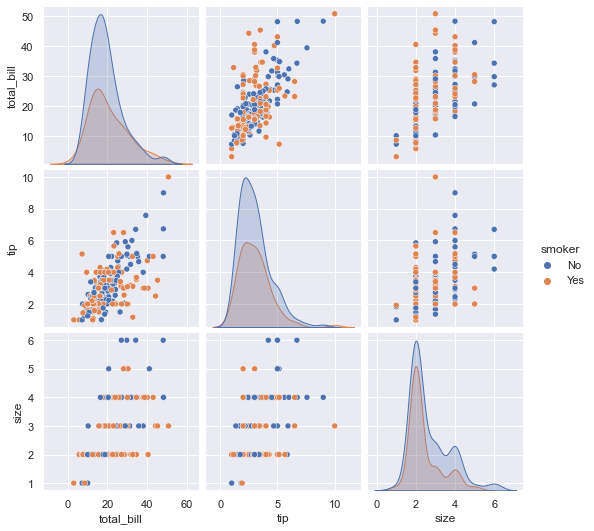

In [69]:
sns.pairplot(df, hue = 'smoker')

In [ ]:
### 10.11 Графики табличного типа

In [70]:
correlation = df.corr()
correlation

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

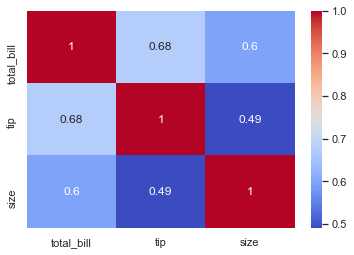

In [75]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [ ]:
### Библиотека Plotly

In [2]:
# !pip install plotly

In [3]:
# !pip install cufflinks

In [19]:
import pandas as pd
#import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

In [13]:
import numpy as np
import pandas as pd

In [17]:
x = np.array([4, 5, 3, 4, 2, 5, 5], dtype = float)
np.mean(x)

4.0

In [18]:
np.median(x)

4.0